Задача 3. 


Данная задача имеет несколько подходов решений. Первый из них это использование библиотеки, например, Tesseract OCR. Данная библиотека способна распознавать текст на изображениях различных форматов, поддерживает множество языков и отличается простотой в использовании. 

Другим способом является использование облачного сервиса от Google, а также моделей глубокого обучения и предобученных моделей с Hugging Face. Данные подходы подходят для повышения точности при работе с нестандартными шрифтами или изображениями низкого качества. Также стоит отметить, что использование моделей глубокого обучения будут требовать больших вычислительных ресурсов и заранее подготовленного датасета. 

Далее будет рассмотрено использование PyTesseract.

In [26]:
from PIL import Image
from pytesseract import pytesseract

In [46]:
path_to_tesseract = r'C:\Users\Katie\AppData\Local\Programs\Tesseract-OCR\tesseract.exe'
pytesseract.tesseract_cmd = path_to_tesseract

Для работы с tesseract первым делом изображение нужно перевести в оттенки серого и/или бинаризация (превращение изображения в черно-белое). Это помогает выделить текстовые объекты и отделить их от фона. 


In [ ]:
import cv2
import pytesseract
import os
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
import numpy as np

folder_path = 'data'
image_files = [file for file in os.listdir(folder_path) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

def preprocess_image(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
    gray = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1] 
    return image, gray



Напишем функцию для отрисовки текста

In [106]:
def display_image_with_text(original_image, results):

    pil_image = Image.fromarray(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    draw = ImageDraw.Draw(pil_image)

    try:
        font = ImageFont.truetype("arial.ttf", 30)  
    except IOError:
        font = ImageFont.load_default()  

    for result in results:
        x, y, w, h = result['bbox']
        draw.rectangle([x, y, x + w, y + h], outline="red", width=2)
        draw.text((x, y - 10), result['text'], font=font, fill="red")
    
    image_with_text = cv2.cvtColor(np.array(pil_image), cv2.COLOR_RGB2BGR)

    plt.figure(figsize=(10, 10))
    plt.imshow(image_with_text)
    plt.axis('off')
    plt.show()


Рассмотрим 8 изображений, которые содержат как русский, так и английский язык. 

Результаты для 0040-040-Obrazets-pisma-zaprosa.jpg:
Текст: Образец, Координаты: (60, 99, 201, 50)
Текст: письма-запроса, Координаты: (282, 110, 379, 39)
Текст: Тенеральному, Координаты: (676, 192, 138, 20)
Текст: директору, Координаты: (822, 197, 102, 15)
Текст: ООО, Координаты: (722, 212, 46, 15)
Текст: «Контур-Аква», Координаты: (775, 212, 148, 20)
Текст: Е., Координаты: (774, 233, 16, 15)
Текст: В., Координаты: (798, 233, 16, 15)
Текст: Шишкину, Координаты: (823, 233, 101, 20)
Текст: 01.03.09, Координаты: (67, 302, 82, 15)
Текст: №, Координаты: (155, 298, 23, 15)
Текст: 125, Координаты: (186, 302, 30, 15)
Текст: на, Координаты: (224, 303, 22, 10)
Текст: №, Координаты: (253, 298, 23, 15)
Текст: 121, Координаты: (284, 302, 28, 11)
Текст: от, Координаты: (320, 303, 20, 10)
Текст: 27.02.09, Координаты: (346, 302, 83, 15)
Текст: О, Координаты: (67, 339, 14, 15)
Текст: ценах, Координаты: (87, 344, 57, 13)
Текст: Ha, Координаты: (150, 344, 22, 10)
Текст: фильтры, Координаты: (179, 338, 87,

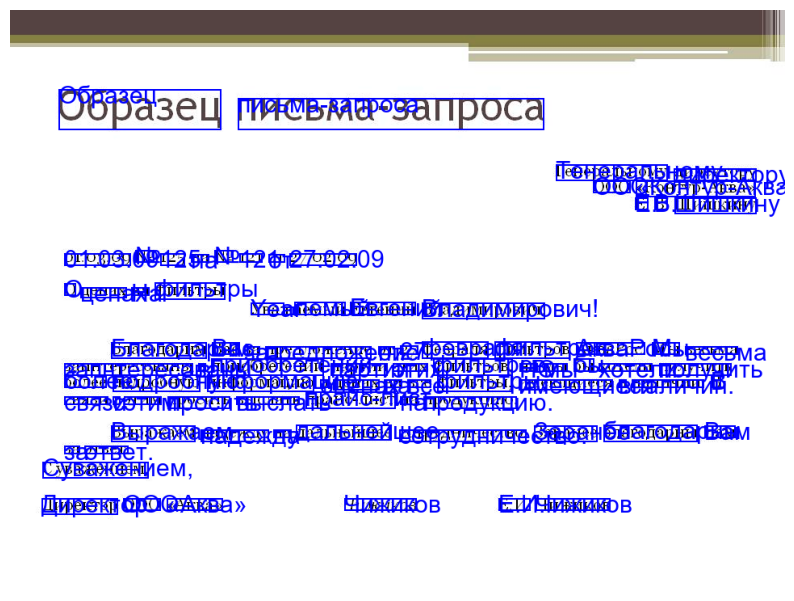

Результаты для 7056807941.jpg:
Текст: СРЕДНИЙ, Координаты: (702, 400, 119, 20)
Текст: УРОВЕНЬ, Координаты: (829, 403, 114, 14)
Текст: INTERMEDIATE, Координаты: (702, 433, 240, 20)
Текст:  , Координаты: (775, 433, 4, 19)
Текст:  , Координаты: (850, 433, 4, 19)
Текст:  , Координаты: (705, 434, 7, 131)
Текст:  , Координаты: (739, 434, 6, 131)
Текст: ›, Координаты: (667, 554, 8, 9)
Текст: BILINGUA, Координаты: (707, 545, 162, 20)
Текст: параллельный, Координаты: (706, 577, 169, 26)
Текст: текст, Координаты: (706, 616, 77, 14)
Текст: сказок, Координаты: (792, 616, 76, 14)
Текст: на, Координаты: (706, 649, 27, 14)
Текст: русском, Координаты: (740, 649, 91, 20)
Текст: и, Координаты: (707, 682, 11, 14)
Текст: английском, Координаты: (728, 676, 134, 20)
Текст: языке, Координаты: (871, 681, 68, 15)
Текст:  , Координаты: (706, 562, 135, 3)
Текст: ®, Координаты: (667, 731, 10, 10)
Текст: —, Координаты: (690, 719, 9, 36)
Текст: классический, Координаты: (706, 723, 155, 21)
Текст: стихотворный, Коор

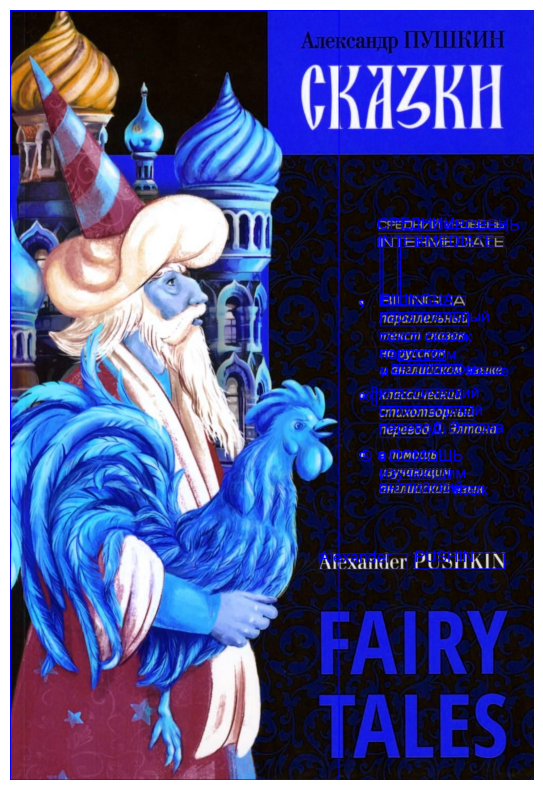

Результаты для lyqz0d9nbxua1.png:
Текст: 19:30, Координаты: (24, 55, 78, 25)
Текст: ®Ф, Координаты: (142, 45, 28, 46)
Текст: р, Координаты: (193, 50, 13, 34)
Текст: ®, Координаты: (250, 50, 16, 14)
Текст: @, Координаты: (292, 49, 24, 35)
Текст: ., Координаты: (359, 61, 10, 10)
Текст: Ot, Координаты: (751, 51, 77, 31)
Текст: @Ф, Координаты: (858, 50, 81, 31)
Текст: Aa, Координаты: (989, 51, 69, 31)
Текст: <-, Координаты: (41, 165, 39, 39)
Текст: @, Координаты: (142, 167, 26, 35)
Текст: Перевод, Координаты: (194, 153, 183, 36)
Текст: на, Координаты: (394, 160, 41, 21)
Текст: русский, Координаты: (454, 152, 165, 37)
Текст: <<:, Координаты: (892, 160, 136, 50)
Текст: chat.openai.com, Координаты: (191, 201, 223, 29)
Текст:    , Координаты: (492, 254, 588, 114)
Текст: —, Координаты: (31, 293, 48, 34)
Текст: Перевод, Координаты: (349, 299, 157, 37)
Текст: на, Координаты: (519, 306, 39, 22)
Текст: русский, Координаты: (572, 299, 144, 37)
Текст: +, Координаты: (1001, 294, 38, 38)
Текст: Ha, Коо

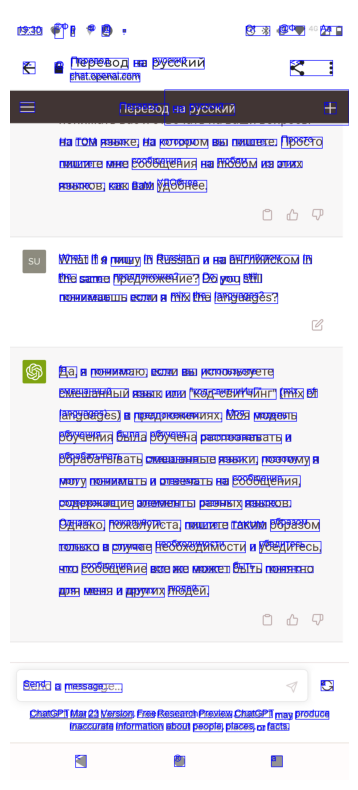

Результаты для MXCQI.jpg:
Текст: с[АЗСЧОЙ, Координаты: (135, 0, 147, 59)
Текст: взмыЛла, Координаты: (297, 2, 172, 36)
Текст: BHCOO, Координаты: (488, 0, 159, 29)
Текст: H, Координаты: (664, 0, 28, 27)
Текст: H3, Координаты: (941, 3, 53, 28)
Текст: BHYTy., Координаты: (1012, 4, 116, 43)
Текст: повернулся, Координаты: (343, 64, 288, 44)
Текст: к, Координаты: (650, 64, 26, 28)
Текст: bywie., Координаты: (693, 54, 151, 52)
Текст: —, Координаты: (194, 154, 38, 6)
Текст: Ты, Координаты: (248, 127, 62, 40)
Текст: готова, Координаты: (325, 130, 160, 34)
Текст: к, Координаты: (504, 129, 26, 30)
Текст: долгому, Координаты: (541, 127, 217, 46)
Текст: путешествию?, Координаты: (773, 129, 369, 44)
Текст: —, Координаты: (1161, 148, 43, 4)
Текст: спросил, Координаты: (1222, 138, 211, 44)
Текст: on,, Координаты: (1448, 148, 71, 32)
Текст: Букля, Координаты: (185, 197, 131, 51)
Текст: с, Координаты: (329, 198, 26, 32)
Текст: достоинством, Координаты: (366, 195, 372, 41)
Текст: ухнула., Координаты: (75

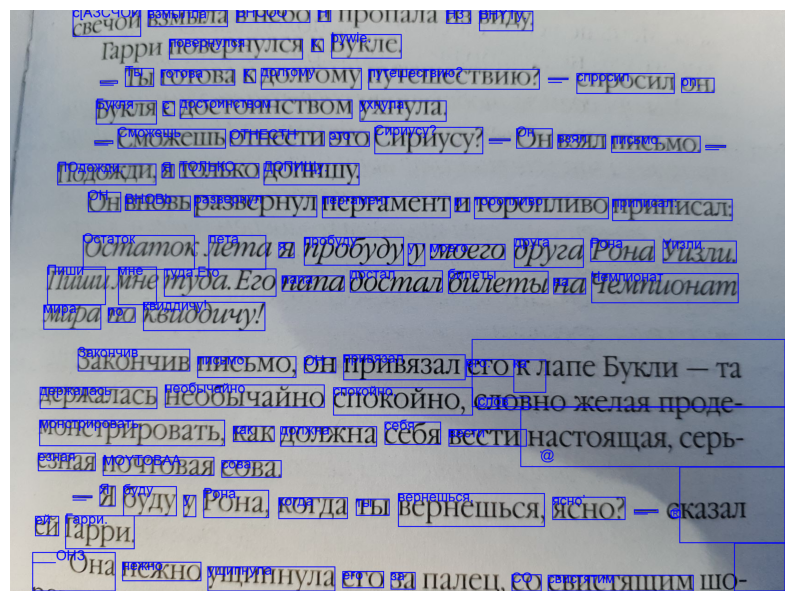

Результаты для stend-vyskazyvaniya-as-pushkina-s-izobrazheniem-svitka-640x820-mm.jpg:
Текст: `Александр, Координаты: (195, 446, 211, 57)
Текст: Сергеекич, Координаты: (408, 453, 188, 50)
Текст: Пушкин, Координаты: (320, 509, 153, 47)
Текст: ne, Координаты: (355, 547, 90, 8)
Текст: —к, Координаты: (513, 548, 18, 9)
Текст: 1799-1837, Координаты: (330, 564, 140, 26)
Текст:  , Координаты: (359, 629, 315, 4)
Текст: Чтенйе, Координаты: (209, 671, 93, 23)
Текст: -, Координаты: (315, 685, 6, 3)
Текст: com, Координаты: (333, 679, 46, 15)
Текст: лучшее, Координаты: (390, 679, 94, 21)
Текст: учение!, Координаты: (496, 674, 95, 26)
Текст: Мысль!, Координаты: (252, 725, 95, 20)
Текст: Великое, Координаты: (358, 725, 102, 20)
Текст: слово!, Координаты: (472, 725, 76, 20)
Текст: Что, Координаты: (139, 754, 51, 19)
Текст: же, Координаты: (201, 758, 34, 15)
Текст: и, Координаты: (247, 758, 14, 14)
Текст: составляет, Координаты: (272, 758, 151, 15)
Текст: величие, Координаты: (434, 754, 99, 19)
Текст: ч

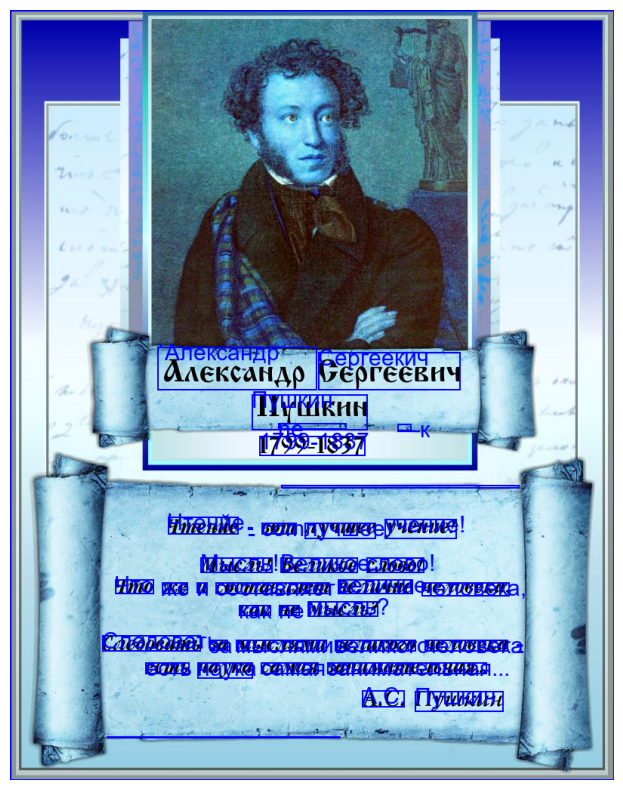

Результаты для test.png:
Текст: Times, Координаты: (9, 11, 95, 62)
Текст: New, Координаты: (115, 14, 74, 59)
Текст: Roman, Координаты: (199, 14, 113, 59)
Текст: Times, Координаты: (10, 114, 90, 60)
Текст: New, Координаты: (110, 114, 70, 60)
Текст: Roman, Координаты: (190, 114, 110, 60)
Текст: Italic, Координаты: (310, 112, 84, 62)
Текст: Times, Координаты: (9, 218, 99, 59)
Текст: New, Координаты: (120, 218, 73, 59)
Текст: Roman, Координаты: (204, 218, 120, 59)
Текст: Bold, Координаты: (336, 218, 77, 59)
Текст: Times, Координаты: (11, 319, 93, 62)
Текст: New, Координаты: (114, 321, 72, 60)
Текст: Roman, Координаты: (196, 321, 117, 60)
Текст: Bold, Координаты: (323, 319, 80, 62)
Текст: Italte, Координаты: (409, 319, 86, 62)


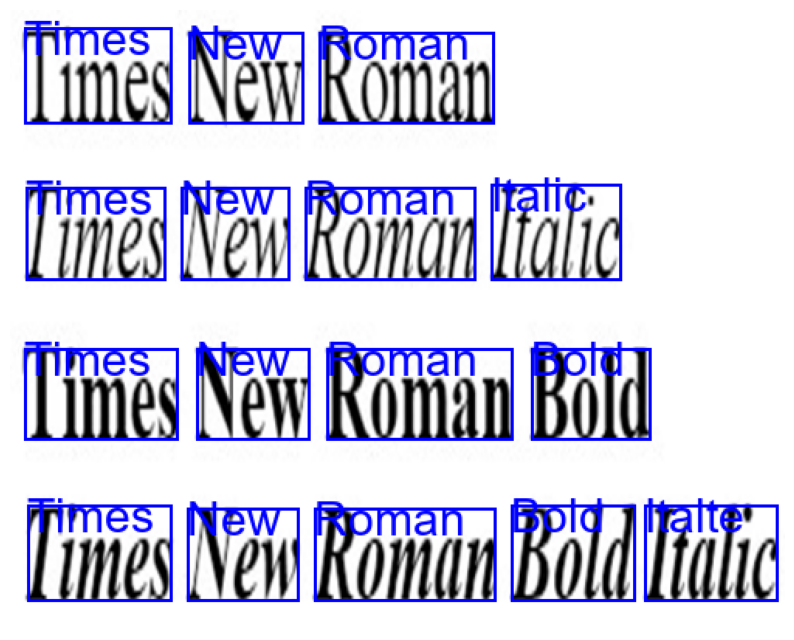

Результаты для test1.jpg:
Текст: «, Координаты: (405, 12, 31, 27)
Текст: @, Координаты: (453, 12, 30, 27)
Текст: Fai, Координаты: (496, 9, 62, 29)
Текст: ©, Координаты: (587, 12, 19, 26)
Текст: 18:25, Координаты: (639, 14, 75, 23)
Текст: Английский, Координаты: (144, 92, 222, 30)
Текст: язык, Координаты: (379, 100, 95, 22)
Текст:    , Координаты: (0, 0, 720, 192)
Текст: Let's, Координаты: (34, 168, 59, 24)
Текст: go., Координаты: (103, 175, 38, 23)
Текст: —, Координаты: (154, 179, 20, 3)
Текст: Пойдёмте., Координаты: (184, 168, 143, 28)
Текст: Me, Координаты: (34, 212, 39, 23)
Текст: neither., Координаты: (83, 211, 96, 24)
Текст: —, Координаты: (192, 222, 20, 3)
Текст: Я, Координаты: (222, 212, 15, 22)
Текст: тоже., Координаты: (246, 218, 74, 17)
Текст: Me, Координаты: (34, 255, 39, 22)
Текст: too., Координаты: (81, 257, 49, 20)
Текст: —, Координаты: (143, 265, 20, 3)
Текст: Я, Координаты: (173, 255, 15, 22)
Текст: тоже., Координаты: (197, 261, 73, 17)
Текст: My, Координаты: (34, 298, 

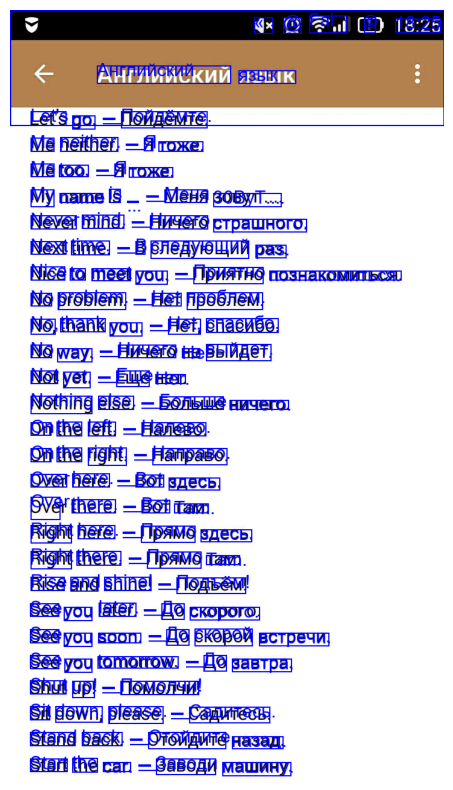

Результаты для test11.jpeg:
Текст: Main, Координаты: (1015, 294, 142, 51)
Текст: Street, Координаты: (1200, 304, 207, 47)
Текст: Restaurant, Координаты: (1453, 315, 353, 42)
Текст: 6332, Координаты: (1072, 362, 137, 40)
Текст: Business, Координаты: (1254, 363, 283, 37)
Текст: Drive, Координаты: (1582, 366, 176, 38)
Текст: Suite, Координаты: (1253, 413, 177, 38)
Текст: 528, Координаты: (1474, 415, 104, 38)
Текст: Palo, Координаты: (938, 469, 141, 37)
Текст: Alto, Координаты: (1120, 467, 144, 37)
Текст: California, Координаты: (1308, 465, 362, 45)
Текст: 94301, Координаты: (1716, 474, 169, 42)
Текст: 575-1628095, Координаты: (1215, 519, 402, 47)
Текст: Fri, Координаты: (988, 689, 102, 48)
Текст: 04/07/2017, Координаты: (1138, 693, 373, 55)
Текст: 11:36, Координаты: (1560, 706, 178, 49)
Текст: AM, Координаты: (1780, 712, 71, 49)
Текст: Merchant, Координаты: (922, 820, 301, 80)
Текст: ID:, Координаты: (1274, 831, 93, 51)
Текст: 9hqjxvufdr, Координаты: (1537, 838, 365, 69)
Текст: Terminal, 

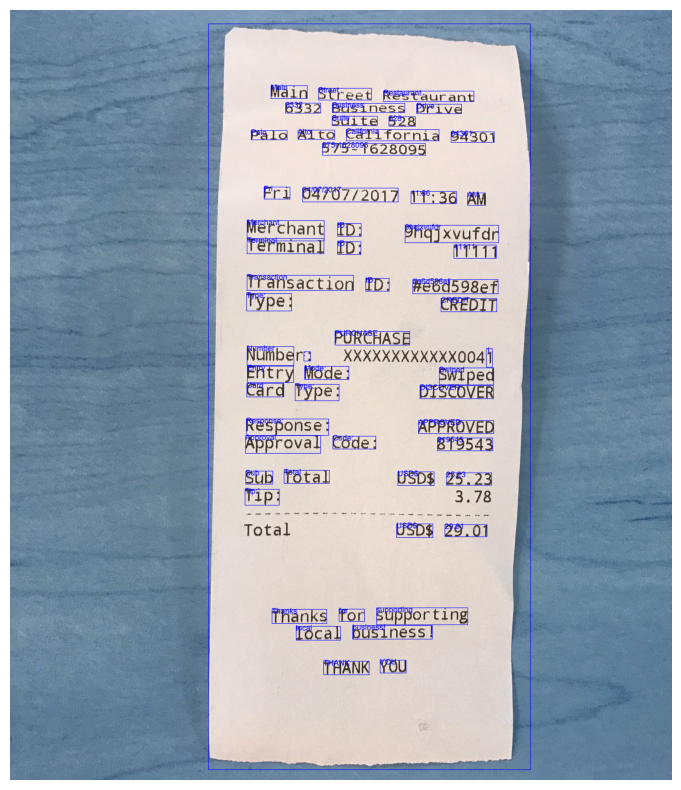

In [108]:
for image_file in image_files:
    image_path = os.path.join(folder_path, image_file)
    print(f"Результаты для {image_file}:")
    
    original_image, processed_image = preprocess_image(image_path)
    
    languages = 'rus+eng'
    data = pytesseract.image_to_data(processed_image, lang=languages, output_type=pytesseract.Output.DICT)

    results = []
    for i in range(len(data['text'])):
        if int(data['conf'][i]) > 10:  
            results.append({
                'text': data['text'][i],
                'bbox': (data['left'][i], data['top'][i], data['width'][i], data['height'][i])
            })
    

    for result in results:
        print(f"Текст: {result['text']}, Координаты: {result['bbox']}")
    

    display_image_with_text(original_image, results)

Можно заметить, что использование библиотеки Tesseract для детектирования текста на изображениях показало свою эффективность для двух языков (можно использовать и больше, ограничений нет). 

Потенциальные проблемы:
1) Текст под углом. Можно попробовать использовать EasyOCR, которая лучше работает с наклоненным изображениями. Также можно попробовать провести предобработку изображения - поворот.
2) Плохое качество изображений. Также можно попробовать улучшить контраст, уменьшить шум с помощью фильтров. Или другой подход - это использование других моделей, которые были обсужденны в самом начале файла.
3) Рукописный текст. В целом, рукописный текст Tesseract может распознавать в том случае, если он написан четко и разборчиво, а буквы имеют достаточную толщину. Однако для более сложных случаев, таких как распознавание рукописного текста в различных стилях или с переменной толщиной букв, лучше использовать специализированные модели, которые были обсужденны в самом начале.


